# Ogólne wprowadzenie

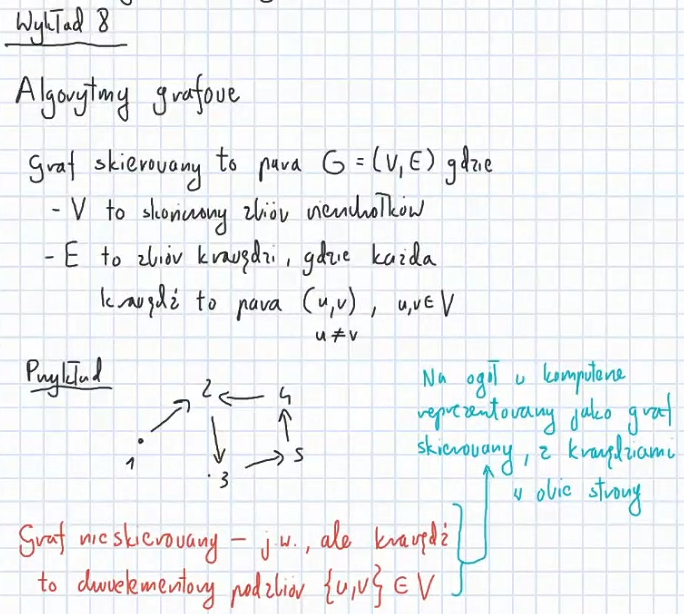

# Reprezentacja grafu

## Lista/tablica krawędzi

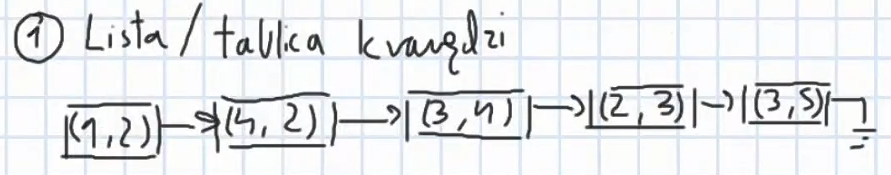

### Zalety i wady

###### Zalety:
- szybkie sprawdzenie liczby wszystkich krawędzi w grafie (czas $ O(1) $ - bo jest to długość tablicy/listy),
- możemy w ten sposób reprezentować dowolny graf (tzn. może mieć on krawędzie wielokrotne, itp.),

###### Wady:
- konieczność przeszukiwania całej listy/tablicy, w celu sprawdzenia: czy istnieje krawędź między wierzchołkami, ile jest wierzchołków grafie, itp.,
- bardzo wysoka trudność zaimplementowania algorytmów, które przeszukują graf,

Z reguły się nie używa tej implementacji, ze względu na wysoką złożoność wielu operacji oraz trudność ich wykonania.

### Przykład

In [1]:
G = [(1, 2), (4, 2), (3, 4), (2, 3), (3, 5)]

## Reprezentacja macierzowa

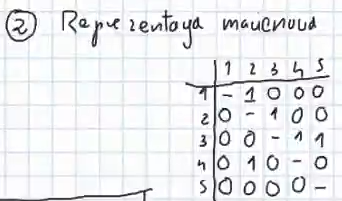

Taka macierz z reguły zawiera wartość $ True $, jeżeli istnieje krawędź z wierzchołka o odpowiednim indeksie $ i $ (odpowiada mu wiersz $ i $. w tablicy) do wierzchołka o indeksie $ j $ (odpowiada mu kolumna $ j $ w tablicy). Jeżeli w komórce $ G[i][j] $, gdzie $ G $ jest macierzą kwadratową, reprezentującą graf, znajduje się wartość $ True $, oznacza to, że z wierzchołka $ i $ jest krawędź skierowana do wierzchołka $ j $, a jeżeli $ False $, to nie ma krawędzi. Przekątna z reguły zawiera jakieś nieistotne wartości, np. $ None $, ponieważ zazwyczaj nie dopuszczamy pętli w grafie.
###### UWAGA
Jeżeli graf jest grafem ważonym, wówczas pole tablicy $ G[i][j] $ zawiera wagę krawędzi, która prowadzi z wierzchołka o indeksie $ i $ do wierzchołka o indeksie $ j $. Jeżeli taka krawędź nie istnieje, wówczas, w zależności od przyjętej konwencji lub rozwiązywanego problemu, pole zawiera wartość $ 0 $, $ \infty $, $ -1 $ lub $ None $, itp.

### Zalety i wady

###### Zalety:
- szybkie sprawdzanie, czy istnieje krawędź między parą wierzchołków (lub jak istnieje, to jaką ma wagę),
- stosunkowo łatwo zaimplementować algorytmy, które korzystają z reprezentacji macierzowej grafu,
- reprezentacja efektywna pamięciowo w przypadku grafów, które mają dużo krawędzi (sporo więcej niż wierzchołków),
- łatwość modyfikacji macierzy w taki sposób, aby dopuszczalne były krawędzie wielokrotne, krawędzie z wagami, itp. (wystarczy zamiast wartości boolowskiej trzymać wagę krawędzi w przypadku grafu o krawędziach ważonych lub tablicę z wagami/numerami/etc. w przypadku grafu o krawędziach wielokrotnych)

###### Wady:
- nadmiarnie zużywana pamięć w przy rzadkich grafach,
- algorytmy, które działają na grafie w reprezentacji macierzowej, z reguły wymagają większej złożoności obliczeniowej od reprezentacji w postaci list sąsiedztwa (przedstawionej niżej) (niektóre algorytmy implementuje się tylko dla grafów w reprezentacji macierzowej, poznamy je później),

### Przykład

Zazwyczaj na wejściu otrzymujemy listę/tablicę krawędzi, ponieważ tak najłatwiej jest ludziom odczytać/zapisać informację o grafie. Taką listę/tablicę z łatwością można przekształcić na reprezentację macierzową.

###### UWAGA:
W przypadku tej reprezentacji, kolejne wierzchołki muszą być oznaczane przez kolejne liczby naturalne, aby zachować ciągłość w indeksowaniu wierszy i kolumn macierzy.

#### Implementacja #1
##### Dla grafów skierowanych bez krawędzi wielokrotnych (krawędzie prowadzą w jedną stronę)

In [2]:
def directed_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[False] * n for _ in range(n)]
    # Store Nones on the main diagonal
    for i in range(n):
        M[i][i] = None
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = True
    return M

###### Kilka testów

In [3]:
E = [(0, 1), (3, 1), (2, 3), (1, 2), (2, 4)]
G = directed_graph_matrix(E, 5)
print(*G, sep='\n')

[None, True, False, False, False]
[False, None, True, False, False]
[False, False, None, True, True]
[False, True, False, None, False]
[False, False, False, False, None]


#### Implementacja #2
##### Dla grafów nieskierowanych bez krawędzi wielokrotnych (krawędzie prowadzą w dwie strony)

Różnica taka, że odbijamy wartości symetrycznie względem przekątnej głównej.

In [4]:
def undirected_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[False] * n for _ in range(n)]
    # Store Nones on the main diagonal
    for i in range(n):
        M[i][i] = None
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = True
    return M

###### Kilka testów

In [5]:
E = [(0, 1), (3, 1), (2, 3), (1, 2), (2, 4)]
G = undirected_graph_matrix(E, 5)
print(*G, sep='\n')

[None, True, False, False, False]
[True, None, True, True, False]
[False, True, None, True, True]
[False, True, True, None, False]
[False, False, True, False, None]


#### Implementacja #3
##### Dla grafów skierowanych ważonych bez krawędzi wielokrotnych (krawędzie prowadzą w jedną stronę)

In [6]:
def wieghted_directed_graph_matrix(E: 'array of weighted edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store Nones on the main diagonal
    for i in range(n):
        M[i][i] = None
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = edge[2]
    return M

###### Kilka testów

In [7]:
E = [(0, 1, -5), (3, 1, 10), (2, 3, 7), (1, 2, -3), (2, 4, 0)]
G = wieghted_directed_graph_matrix(E, 5)
print(*G, sep='\n')

[None, -5, 0, 0, 0]
[0, None, -3, 0, 0]
[0, 0, None, 7, 0]
[0, 10, 0, None, 0]
[0, 0, 0, 0, None]


#### Implementacja #4
##### Dla grafów nieskierowanych ważonych bez krawędzi wielokrotnych (krawędzie prowadzą w dwie strony)

Różnica taka, że odbijamy wartości symetrycznie względem przekątnej głównej.

In [8]:
def wieghted_undirected_graph_matrix(E: 'array of weighted edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store Nones on the main diagonal
    for i in range(n):
        M[i][i] = None
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = edge[2]
    return M

###### Kilka testów

In [9]:
E = [(0, 1, -5), (3, 1, 10), (2, 3, 7), (1, 2, -3), (2, 4, 0)]
G = wieghted_undirected_graph_matrix(E, 5)
print(*G, sep='\n')

[None, -5, 0, 0, 0]
[-5, None, -3, 10, 0]
[0, -3, None, 7, 0]
[0, 10, 7, None, 0]
[0, 0, 0, 0, None]


#### Implementacja #5
##### Dla grafów skierowanych ważonych o krawędziach wielokrotnych (dopuszczalne pętle)

In [10]:
def wieghted_directed_multigraph_matrix(E: 'array of weighted edges', n: 'number of vertices'):
    M = [[[] for _ in range(n)] for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]].append(edge[2])
    return M

###### Kilka testów

In [11]:
E = [(0, 1, -5), (3, 1, 10), (2, 3, 7), (1, 2, -3), (2, 4, 0), (3, 1, -5), (0, 1, 2), (0, 0, -10)]
G = wieghted_directed_multigraph_matrix(E, 5)
print(*G, sep='\n')

[[-10], [-5, 2], [], [], []]
[[], [], [-3], [], []]
[[], [], [], [7], [0]]
[[], [10, -5], [], [], []]
[[], [], [], [], []]


#### Implementacja #6
##### Dla grafów nieskierowanych ważonych o krawędziach wielokrotnych (dopuszczalne pętle)

In [12]:
def wieghted_undirected_multigraph_matrix(E: 'array of weighted edges', n: 'number of vertices'):
    M = [[[] for _ in range(n)] for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]].append(edge[2])
        if edge[0] != edge[1]:
            M[edge[1]][edge[0]].append(edge[2])
    return M

###### Kilka testów

In [13]:
E = [(0, 1, -5), (3, 1, 10), (2, 3, 7), (1, 2, -3), (2, 4, 0), (3, 1, -5), (0, 1, 2), (0, 0, -10)]
G = wieghted_undirected_multigraph_matrix(E, 5)
print(*G, sep='\n')

[[-10], [-5, 2], [], [], []]
[[-5, 2], [], [-3], [10, -5], []]
[[], [-3], [], [7], [0]]
[[], [10, -5], [7], [], []]
[[], [], [0], [], []]


## Listy sąsiedztwa

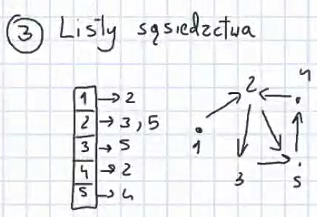

Zazwyczaj reprezentację tę interpretujemy w taki sposób, że indeks $ u $ odpowiada wierzchołkowi o indeksie $ u $, a w tablicy $ G $, reprezentującej graf, w komórce $ G[u] $ znajduje się lista/tablica wierzchołków, do których możemy dotrzeć z danego wierzchołka $ u $. (Jeżeli graf jest grafem ważonym, to trzymamy w tablicy/liście odsyłaczowej pary postaci $ (v, weight) $, gdzie $ v $ jest wierzchołkiem, do którego prowadzi krawędź z wierzchołka $ u $ o wadze $ weight $). Jeżeli z krawędziami wiążemy więcej informacji, zwykle przechowujemy je jako kolejne wartości (dodajemy do krotki $ (v, weight, ...) $ inne potrzebne wartości w miejscu $ ... $).
###### UWAGA
Ponieważ nie da się zapisać jednej krawędzi nieskierowanej, krawędź nieskierowaną reprezentujemy jako dwie krawędzie skierowane (od wierzchołka $ u $ do $ v $ jedna i od $ v $ do $ u $ druga). Musimy w takiej sytuacji do listy sąsiedztwa wierzchołka $ u $ dodać wierzchołek $ v $ (oraz inne potrzebne wartości, takie jak waga krawędzi, jeżeli potrzebujemy przechowywać więcej informacji), a także do listy sąsiedztwa wierzchołka $ v $ dodajemy wierzchołek $ u $.

### Zalety i wady

###### Zalety:
- reprezentacja zawsze efektywna pamięciowo (zajmowane jest tyle pamięci ile potrzeba najmniej, by zachować pełną informację o grafie),
- bardzo łatwo zaimplementować algorytmy, działające na grafie, reprezentowanym w taki sposób,
- bardzo szybki dostęp do wszystkich wierzchołków, do których możemy dotrzeć z danego wierzchołka (nie musimy przechodzić przez cały wiersz wartości, jak w reprezentacji macierzowej),

###### Wady:
- niewydajne sprawdzanie, czy istnieje krawędź między parą wierzchołków (lub jaką ma wagę dana krawędź) (mimo to, i tak jest ono dużo szybsze niż w przypadku listy krawędzi, ponieważ sprawdzamy tylko wierzchołki, jakie są połączone z danym wierzchołkiem, a nie wszystkie istniejące krawędzie)

### Przykład

Zazwyczaj na wejściu otrzymujemy listę/tablicę krawędzi, ponieważ tak najłatwiej jest ludziom odczytać/zapisać informację o grafie. Taką listę/tablicę z łatwością można przekształcić na reprezentację w postaci list sąsiedztwa.

###### UWAGA:
W przypadku tej reprezentacji, kolejne wierzchołki muszą być oznaczane przez kolejne liczby naturalne, aby zachować ciągłość w indeksowani tablicy, zwierającej sąsiadów danego wierzchołka. Bardzo łatwo można jednak, przy pomocy hashmapy (słownika w Pythonie), zapisywać sąsiadów wierzchołków, reprezentowanych w dowolny sposób (np. jako tekst, dowolną liczbę, obiekt, itp.).

#### Implementacja #1
##### Dla grafów skierowanych bez krawędzi wielokrotnych (krawędzie prowadzą w jedną stronę)

In [14]:
def directed_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G

###### Kilka testów

In [15]:
E = [(0, 1), (3, 1), (2, 3), (1, 2), (2, 4)]
G = directed_graph_list(E, 5)
print(*G, sep='\n')

[1]
[2]
[3, 4]
[1]
[]


#### Implementacja #2
##### Dla grafów nieskierowanych bez krawędzi wielokrotnych (krawędzie prowadzą w dwie strony)

In [16]:
def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G

###### Kilka testów

In [17]:
E = [(0, 1), (3, 1), (2, 3), (1, 2), (2, 4)]
G = undirected_graph_list(E, 5)
print(*G, sep='\n')

[1]
[0, 3, 2]
[3, 1, 4]
[1, 2]
[2]


#### Implementacja #3
##### Dla grafów skierowanych ważonych (krawędzie prowadzą w jedną stronę; dopuszczalne krawędzie wielokrotne i pętle)

In [18]:
def directed_weighted_graph_list(E: 'array of weighted edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append((edge[1], edge[2]))
    return G

###### Kilke testów

In [19]:
E = [(0, 1, -5), (3, 1, 10), (2, 3, 7), (1, 2, -3), (2, 4, 0), (3, 1, -5), (0, 1, 2), (0, 0, -10)]
G = directed_weighted_graph_list(E, 5)
print(*G, sep='\n')

[(1, -5), (1, 2), (0, -10)]
[(2, -3)]
[(3, 7), (4, 0)]
[(1, 10), (1, -5)]
[]


#### Implementacja #4
##### Dla grafów nieskierowanych ważonych (krawędzie prowadzą w dwie strony; dopuszczalne krawędzie wielokrotne i pętle)

In [20]:
def undirected_weighted_graph_list(E: 'array of weighted edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append((edge[1], edge[2]))
        G[edge[1]].append((edge[0], edge[2]))
    return G

###### Kilke testów

In [21]:
E = [(0, 1, -5), (3, 1, 10), (2, 3, 7), (1, 2, -3), (2, 4, 0), (3, 1, -5), (0, 1, 2), (0, 0, -10)]
G = undirected_weighted_graph_list(E, 5)
print(*G, sep='\n')

[(1, -5), (1, 2), (0, -10), (0, -10)]
[(0, -5), (3, 10), (2, -3), (3, -5), (0, 2)]
[(3, 7), (1, -3), (4, 0)]
[(1, 10), (2, 7), (1, -5)]
[(2, 0)]


# Trawersacja grafu

## BFS (Breadth First Search)

### Omówienie algorytmu

Jak sama nazwa mówi, jest to algorytm przeszukiwania wszerz (zawsze sprawdza kolejno najbliższe wierzchołki grafu, idąc niczym fale rozchodzące się na wodzie)

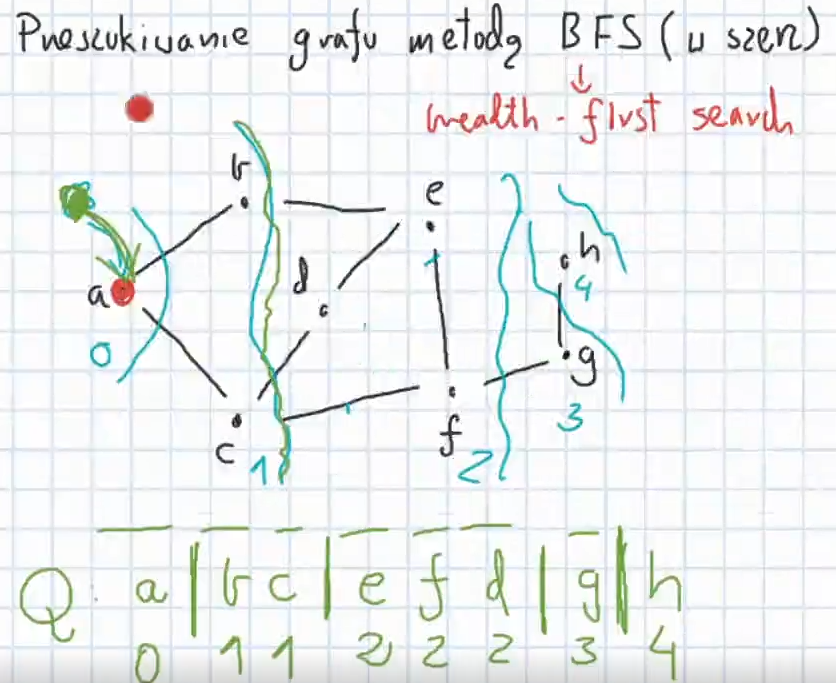

### Złożoność

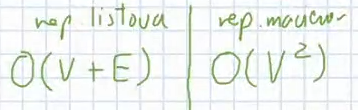

### Implementacja #1
##### Dla reprezentacji grafu nieskierowanego nieważonego, przy pomocy listy sąsiedztwa

Dla innych sposobów reprezentacji grafów oraz innych grafów, algorytm jest bardzo podobny i łatwo go przerobić. Z tego powodu ograniczę się tylko do pojedynczej implementacji dla reprezentacji macierzowej oraz dla reprezentacji, przy pomocy listy sąsiedztwa.

In [22]:
from queue import Queue

def bfs(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    queue = Queue()
    
    for i in range(n):
        if visited[i]: continue
        queue.put(i)
        visited[i] = True
    
        while not queue.empty():
            j = queue.get()
            print(j)
            for v in G[j]:
                if not visited[v]:
                    visited[v] = True
                    queue.put(v)

###### Kilka testów

In [23]:
# a - 0, b - 1, c - 2, d - 3, e - 4, f - 5, g - 6, h - 7
E = [(0, 1), (0, 2), (1, 4), (4, 3), (2, 3), (4, 5), (2, 5), (5, 6), (6, 7)]

G = undirected_graph_list(E, 8)
print(*G, sep='\n')
bfs(G)

[1, 2]
[0, 4]
[0, 3, 5]
[4, 2]
[1, 3, 5]
[4, 2, 6]
[5, 7]
[6]
0
1
2
4
3
5
6
7


### Implementacja #2
##### Dla reprezentacji grafu nieskierowanego nieważonego, przy pomocy macierzy

In [24]:
from queue import Queue

def bfs(G: 'graph represented using matrix'):
    n = len(G)
    visited = [False] * n
    queue = Queue()
    
    for i in range(n):
        if visited[i]: continue
        queue.put(i)
        visited[i] = True
        while not queue.empty():
            j = queue.get()
            print(j)
            for k in range(n):
                if G[j][k] and not visited[k]:
                    visited[k] = True
                    queue.put(k)

###### Kilka testów

In [25]:
# a - 0, b - 1, c - 2, d - 3, e - 4, f - 5, g - 6, h - 7
E = [(0, 1), (0, 2), (1, 4), (4, 3), (2, 3), (4, 5), (2, 5), (5, 6), (6, 7)]

G = undirected_graph_matrix(E, 8)
print(*G, sep='\n')
bfs(G)

[None, True, True, False, False, False, False, False]
[True, None, False, False, True, False, False, False]
[True, False, None, True, False, True, False, False]
[False, False, True, None, True, False, False, False]
[False, True, False, True, None, True, False, False]
[False, False, True, False, True, None, True, False]
[False, False, False, False, False, True, None, True]
[False, False, False, False, False, False, True, None]
0
1
2
4
3
5
6
7


## DFS (Depth First Search)

### Omówienie algorytmu

Jak sama nazwa mówi, jest to algorytm przeszukiwania wgłąb (zawsze idzie najdalej, jak to możliwe i dopiero później cofa się do wcześniejszych wierzchołków, by znowu dojść do końca inną ścieżką). Idzie on w sposób losowy, więc jeżeli zaczyna się cofać, nie oznacza to, że znalazł on najdłuższą ścieżkę, a jedynie to, że wszedł "w ślepą uliczkę" - dotarł do wierzchołka wcześniej odwiedzonego lub takiego, który nie ma sąsiadów (poza wierzchołkiem, z którego przyszliśmy).

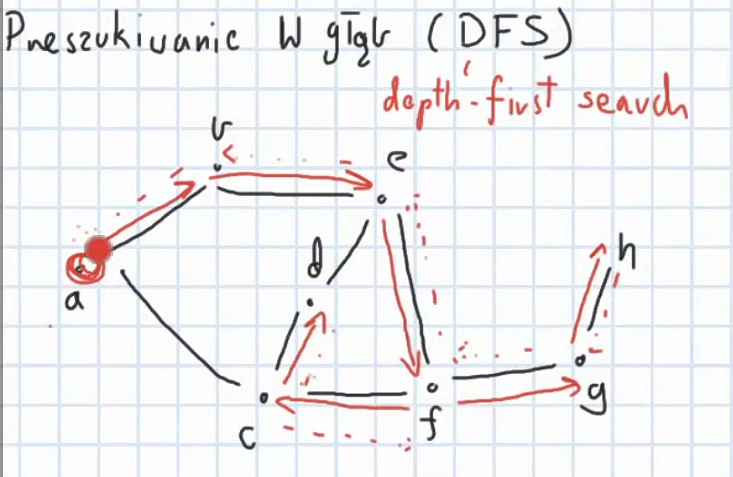

### Złożoność

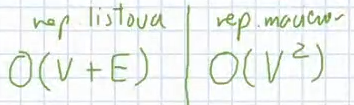

### Implementacje rekurencyjne

### Implementacja #1
##### Dla reprezentacji grafu nieskierowanego nieważonego, przy pomocy listy sąsiedztwa

In [26]:
def dfs(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    
    def recur(i):
        if visited[i]:
            return
        
        visited[i] = True
        print(i)
        for v in G[i]:
            recur(v)
        
    # For inconsistent graphs we have to check each vertex separately
    for i in range(n):
        recur(i)

###### Kilka testów

In [27]:
# a - 0, b - 1, c - 2, d - 3, e - 4, f - 5, g - 6, h - 7
E = [(0, 1), (0, 2), (1, 4), (4, 3), (2, 3), (4, 5), (2, 5), (5, 6), (6, 7)]

G = undirected_graph_list(E, 8)
print(*G, sep='\n')
dfs(G)

[1, 2]
[0, 4]
[0, 3, 5]
[4, 2]
[1, 3, 5]
[4, 2, 6]
[5, 7]
[6]
0
1
4
3
2
5
6
7


### Implementacja #2
##### Dla reprezentacji grafu nieskierowanego nieważonego, przy pomocy macierzy

In [28]:
def dfs(G: 'graph represented using matrix'):
    n = len(G)
    visited = [False] * n
    
    def recur(i):
        if visited[i]:
            return
        
        visited[i] = True
        print(i)
        for j in range(n):
            if G[i][j]:
                recur(j)
        
    # For inconsistent graphs we have to check each vertex separately
    for i in range(n):
        recur(i)

###### Kilka testów

In [29]:
# a - 0, b - 1, c - 2, d - 3, e - 4, f - 5, g - 6, h - 7
E = [(0, 1), (0, 2), (1, 4), (4, 3), (2, 3), (4, 5), (2, 5), (5, 6), (6, 7)]

G = undirected_graph_matrix(E, 8)
print(*G, sep='\n')
dfs(G)

[None, True, True, False, False, False, False, False]
[True, None, False, False, True, False, False, False]
[True, False, None, True, False, True, False, False]
[False, False, True, None, True, False, False, False]
[False, True, False, True, None, True, False, False]
[False, False, True, False, True, None, True, False]
[False, False, False, False, False, True, None, True]
[False, False, False, False, False, False, True, None]
0
1
4
3
2
5
6
7


### Implementacje iteracyjne

### Implementacja #1
##### Dla reprezentacji grafu nieskierowanego nieważonego, przy pomocy listy sąsiedztwa

In [30]:
def dfs(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    stack = []
    
    # For inconsistent graphs we have to check each vertex separately
    for i in range(n):
        if visited[i]: continue
        visited[i] = True
        stack = [i]
        while stack:
            j = stack.pop()
            print(j)
            for v in G[j]:
                if not visited[v]:
                    stack.append(v)
                    visited[v] = True

###### Kilka testów

In [31]:
# a - 0, b - 1, c - 2, d - 3, e - 4, f - 5, g - 6, h - 7
E = [(0, 1), (0, 2), (1, 4), (4, 3), (2, 3), (4, 5), (2, 5), (5, 6), (6, 7)]

G = undirected_graph_list(E, 8)
print(*G, sep='\n')
dfs(G)

[1, 2]
[0, 4]
[0, 3, 5]
[4, 2]
[1, 3, 5]
[4, 2, 6]
[5, 7]
[6]
0
2
5
6
7
4
3
1


### Implementacja #2
##### Dla reprezentacji grafu nieskierowanego nieważonego, przy pomocy macierzy

In [32]:
def dfs(G: 'graph represented using matrix'):
    n = len(G)
    visited = [False] * n
    stack = []
    
    # For inconsistent graphs we have to check each vertex separately
    for i in range(n):
        if visited[i]: continue
        visited[i] = True
        stack = [i]
        while stack:
            j = stack.pop()
            print(j)
            for k in range(n):
                if G[j][k] and not visited[k]:
                    stack.append(k)
                    visited[k] = True

###### Kilka testów

In [33]:
# a - 0, b - 1, c - 2, d - 3, e - 4, f - 5, g - 6, h - 7
E = [(0, 1), (0, 2), (1, 4), (4, 3), (2, 3), (4, 5), (2, 5), (5, 6), (6, 7)]

G = undirected_graph_matrix(E, 8)
print(*G, sep='\n')
dfs(G)

[None, True, True, False, False, False, False, False]
[True, None, False, False, True, False, False, False]
[True, False, None, True, False, True, False, False]
[False, False, True, None, True, False, False, False]
[False, True, False, True, None, True, False, False]
[False, False, True, False, True, None, True, False]
[False, False, False, False, False, True, None, True]
[False, False, False, False, False, False, True, None]
0
2
5
6
7
4
3
1
